#**Caso: Predicción de abandono de clientes en una empresa de telecomunicaciones**
**Contexto:**

Una empresa de telecomunicaciones quiere reducir la pérdida de clientes (churn). Para ello, te han proporcionado un conjunto de datos históricos sobre sus clientes actuales y pasados. Tu tarea es analizar estos datos y construir un modelo que prediga la probabilidad de que un cliente abandone la empresa.

🧭 Tareas a realizar

1. Análisis Exploratorio de Datos (EDA)

  * Describir el conjunto de datos: tipos de variables, valores nulos, estadísticas básicas.

  * Visualizaciones clave (distribuciones, correlaciones, etc.).

  * Identificar patrones relacionados con el abandono (Churn).

2. Limpieza y Preparación de Datos

  * Tratamiento de valores nulos.

  * Codificación de variables categóricas.

  * Normalización o estandarización si es necesario.

3. Modelado Predictivo

  * Separar conjunto de entrenamiento y prueba.

  * Probar al menos dos modelos de clasificación (ej: Regresión Logística, Árboles de Decisión, Random Forest, etc.).

  * Evaluar los modelos (precisión, recall, F1-score, curva ROC).

5. Interpretación y Recomendaciones

  * ¿Qué variables son más importantes para predecir el churn?

  * ¿Qué acciones propondrías a la empresa para reducir la pérdida de clientes?

6. Entrega

  * Un notebook Jupyter o Google Colab con el análisis completo.

  * Un resumen ejecutivo (máximo 1 página) explicando los hallazgos clave y recomendaciones, escrito para alguien no técnico.

In [455]:
# ------------------------- Librerias requeridas --------------------------------------------

# Tratamiento de datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Visualización de datos
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import plotly.express as px

# Selección de variables y medición del desempeño
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import make_scorer, f1_score

# Modelos Candidatos
from sklearn.linear_model import LogisticRegression      # Regresión logística
from sklearn.ensemble import RandomForestClassifier      # Clasificador bosques aleatorios
from xgboost import XGBClassifier                        # XGBoost

In [402]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"


# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
)

<ipython-input-402-348747ac6790>:9: DeprecationWarning:

load_dataset is deprecated and will be removed in a future version.



## Análisis Exploratorio de Datos (EDA)

### Exploración inicial de los datos

In [403]:
# Información general de los datos
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [404]:
# Verificación de Nulos y duplicados
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [405]:
# Descripción estadística
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [406]:
# Transformacion de la Variable "TotalCharges"
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan) # Este código fue necesario debido a que presentaba datos NaN
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [407]:
# Información general de los datos
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [408]:
# Datos faltantes
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [409]:
# Eliminar datos "NaN"
df = df.dropna(subset=['TotalCharges']).reset_index(drop=True)

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Conclusiones:
- La base de datos no presenta valores nulos ni registros duplicados.
- El conjunto de datos está compuesto por 21 variables, las cuales se distribuyen entre variables numéricas, categóricas y binarias.
- El análisis estadístico muestra que solo el 16 % de los clientes son adultos mayores, con una antigüedad promedio de 32 meses y gastos mensuales medios de 64,76.
- Fue necesario realizar una primera transformación en la variable "TotalCharges", ya que aunque representa valores numéricos, originalmente estaba clasificada como texto (object). Esta conversión fue esencial para el análisis exploratorio.
- Dado que los valores NaN en la variable "TotalCharges" representan solo una fracción muy pequeña del total (11 de 7,043 registros), se optó por eliminar estas filas.
- Tras la eliminación de los 11 registros que presentaban valores "NaN" en la variable "TotalCharges", el conjunto de datos quedó conformado por 7,032 registros

### Análisis Variable Objetivo

In [411]:
# Variable Respuesta (target)
print(df['Churn'].value_counts())
_ = df['Churn'].value_counts()

# Crear el gráfico de torta
fig = px.pie(values = _, names = _.index)
fig.show()

Churn
No     5163
Yes    1869
Name: count, dtype: int64


Conclusiones:
- El 26.5% han renunciado al servicio, equivalente a un total de 1,869 clientes.
- La distribución de clases binarias presenta un desequilibrio moderado.

### Análisis de Variables Categóricas

In [412]:
# Información de las variables categóricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_cols = [col for col in cat_cols if col not in ['customerID', 'Churn']]

for col in cat_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts(dropna=False))
    print("\n")

--- gender ---
gender
Male      3549
Female    3483
Name: count, dtype: int64


--- Partner ---
Partner
No     3639
Yes    3393
Name: count, dtype: int64


--- Dependents ---
Dependents
No     4933
Yes    2099
Name: count, dtype: int64


--- PhoneService ---
PhoneService
Yes    6352
No      680
Name: count, dtype: int64


--- MultipleLines ---
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


--- InternetService ---
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


--- OnlineSecurity ---
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64


--- OnlineBackup ---
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64


--- DeviceProtection ---
DeviceProtection
No                     3094
Yes                    2418
No internet ser

In [413]:
# Funcion Binarias
# Grafico

def vovsenc(df, x_col, y_col, color_col):
    # Calcular el conteo de valores
    counts = df.groupby([x_col, color_col]).size().reset_index(name=y_col)

    # Crear el gráfico de barras
    fig = px.bar(counts, x=x_col, y=y_col, color=color_col,
                 title=f'Distribución de {color_col} por {x_col}',
                 labels={'Category': 'Categoría', 'Count': 'Cantidad de Clientes', 'Attrition': 'Attrition'})
    fig.update_xaxes(tickvals=[1, 2, 3, 4, 5, 6])
    return fig


In [414]:
# Genero
fig = vovsenc(df, 'gender', 'Count', 'Churn')
fig.show()

- No se observa una dominancia de género en el abandono; las mujeres superan a los hombres solo por 9 casos

In [415]:
# Personas mayores
fig = vovsenc(df, 'SeniorCitizen', 'Count', 'Churn')
fig.show()

- La mayoría de los clientes no son ciudadanos senior.
- Entre los clientes que sí son ciudadanos senior, aunque son muchos menos, la proporción de clientes que se van  es visiblemente mayor en comparación con los no seniors.

In [416]:
# Pareja
fig = vovsenc(df, 'Partner', 'Count', 'Churn')
fig.show()

- Los clientes que no tienen pareja muestran una mayor proporción de deserción.

In [417]:
# Personas dependientes
fig = vovsenc(df, 'Dependents', 'Count', 'Churn')
fig.show()

- Los clientes que no son dependientes son más propensos a cancelar el servicio.

In [418]:
# Función categorica
# Graficas
def vovsstr(df, x_col, y_col, color_col):
    counts = df.groupby([x_col, color_col]).size().reset_index(name=y_col)
    counts = counts.sort_values(by=y_col)
    fig = px.bar(counts, x=y_col, y=x_col, color=color_col,
                 title=f'Distribución de {color_col} por {x_col}',
                 labels={'Category': 'Categoría', 'Count': 'Cantidad de Clientes', 'Attrition': 'Attrition'},
                 orientation='h',
                 color_discrete_map={'rf': 'red', 'rg': 'green', 'rh': 'blue'})
    return fig

In [419]:
# Contrato
fig = vovsstr(df, 'Contract', 'Count', 'Churn')
fig.show()

- Los clientes con contrato mensual tienen una probabilidad de desertar significativamente mayor que aquellos con contratos anuales o bienales.

In [420]:
# Servicio de Internet
fig = vovsstr(df, 'InternetService', 'Count', 'Churn')
fig.show()

- Los clientes con Internet de fibra óptica son más propensos a desertar que los que tienen DSL o no tienen servicio.

In [421]:
# Servicio Tecnico
fig = vovsstr(df, 'TechSupport', 'Count', 'Churn')
fig.show()

- Tener soporte técnico parece estar asociado con una menor tasa de deserción.
- Los clientes sin soporte técnico probablemente experimenten problemas no resueltos, lo que podría motivar su salida.

In [422]:
# Metodo de pago
fig = vovsstr(df, 'PaymentMethod', 'Count', 'Churn')
fig.show()

- Los clientes que usan cheque electronico son más propensos a desertar que los otros metodos de pago.

### Análisis de Variables Numericas

In [423]:
# Función categorica
# Graficas

def vovsnum(df, x_col, y_col):
    fig = px.box(df, x=x_col, y=y_col,
                 title=f'Distribución de {y_col} por {x_col}',
                 points='outliers',
                 labels={x_col: x_col, y_col: y_col})
    return fig

In [424]:
# Permanencia
fig = vovsnum(df, 'Churn', 'tenure')
fig.show()

- Los clientes que no hacen churn suelen tener un mayor tiempo de permanencia, con una mediana claramente más alta. Esto indica mayor fidelidad.
- La mayoría de los clientes que hacen churn lo hacen en los primeros meses.

In [425]:
# Gastos Mensuales
fig = vovsnum(df, 'Churn', 'MonthlyCharges')
fig.show()

- Los clientes que hacen churn tienen cargos mensuales más altos en promedio.
- Los que no hacen churn tienden a tener cargos mensuales más bajos y variados.

In [426]:
# Gastos Totales
fig = vovsnum(df, 'Churn', 'TotalCharges')
fig.show()

- Los clientes que desertan tienen cargos totales mucho más bajos, lo que indica que permanecen poco tiempo con la empresa.


## Limpieza y transformación

In [427]:
# Reemplazar "No internet service" y "No phone service" por "No"
df.replace(['No internet service', 'No phone service'], 'No', inplace=True)

In [428]:
# Asignar categoria a "SeniorCitizen"
SeniorCitizen = {
    0:'Yes',
    1:'No'}
df.SeniorCitizen = df.SeniorCitizen.replace(SeniorCitizen)

In [429]:
# Asignar categoria a "gender"
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0}).astype(float)

<ipython-input-429-95e84350157a>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [430]:
# Convertir "Yes" a 1 y "No" a 0
df = df.replace({'Yes': 1, 'No': 0})

<ipython-input-430-afa9dd3481ae>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [431]:
# Crear variable "tenure" a años
condicion = [
    (df.tenure >= 0) & (df.tenure <= 12),
    (df.tenure > 12) & (df.tenure <= 24),
    (df.tenure > 24) & (df.tenure <= 36),
    (df.tenure > 36) & (df.tenure <= 48),
    (df.tenure > 48) & (df.tenure <= 60),
    (df.tenure > 60)
]

opcion = ['0-1año', '1-2años', '2-3años', '3-4años', '4-5años', '5 o más']
df['tenure_ran'] = np.select(condicion, opcion, default='Desconocido')

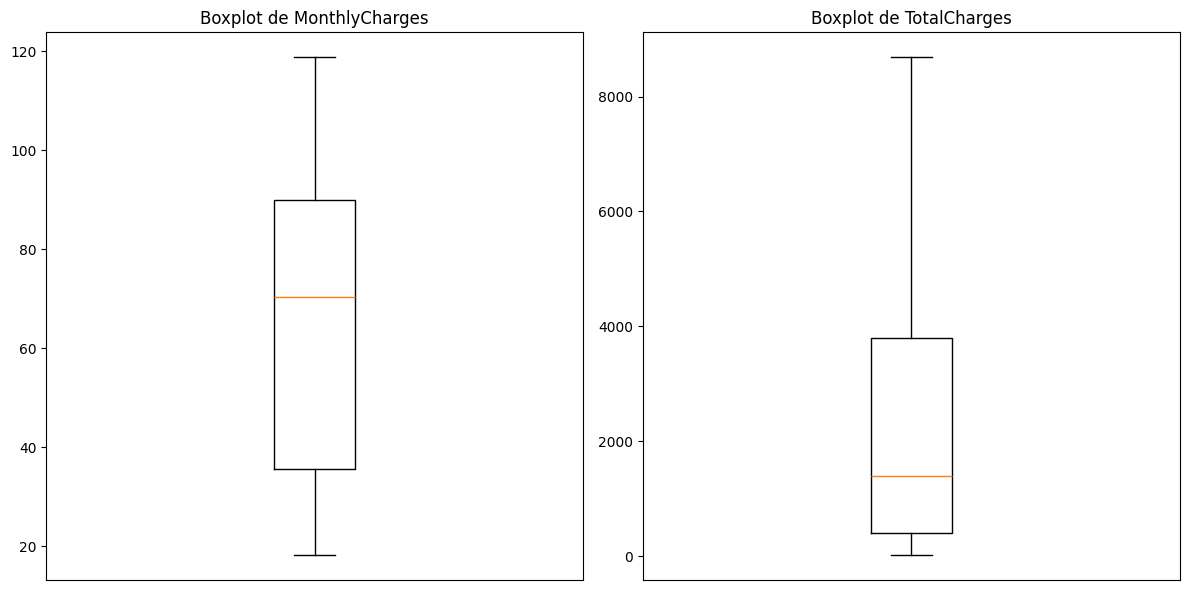

In [432]:
# Tratamiento de atípicos
var = ['MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, len(var), figsize=(12, 6))

for i, v in enumerate(var):
    axes[i].boxplot(df[v].dropna())
    axes[i].set_title(f'Boxplot de {v}')
    axes[i].set_xticks([])

plt.tight_layout()
plt.show()

No hay presencia de atípicos, por lo que no fue necesario un tratamiento.  

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   float64
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  


In [434]:
# Dumies
list_cat =  ["InternetService","Contract","PaymentMethod","tenure_ran"]
df = pd.get_dummies(df, columns=list_cat, drop_first=True)

## Modelos

### Terminar preprocesado

In [435]:
# Dividir los datos en conjuntos de entrenamiento y prueba; 80% y 20%
y = df.Churn
X= df.loc[:,~df.columns.isin(['Churn', 'customerID'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [436]:
# Escalar variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Selección de variables (Método Wrapper)

In [437]:
# Modelos
m_lr = LogisticRegression(max_iter=1000, random_state=42)
m_rf = RandomForestClassifier(random_state=42)
m_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

modelos = [m_lr, m_rf, m_xgb]

In [438]:
# Función de selección de variables
def sel_variables(modelos, X, y, threshold="2.5*mean"):
    var_names_ac = np.array([])

    for modelo in modelos:
        modelo.fit(X, y)
        sel = SelectFromModel(modelo, prefit=True, threshold=threshold)

        try:
            var_names = modelo.feature_names_in_[sel.get_support()]
        except AttributeError:
            var_names = X.columns[sel.get_support()]

        var_names_ac = np.append(var_names_ac, var_names)

    var_names_ac = np.unique(var_names_ac)
    return var_names_ac

In [439]:
# Aplicar la selección solo sobre X_train e y_train
var_names = sel_variables(modelos, X_train, y_train, threshold="2.5*mean")
var_names.shape

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[18:18:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




(6,)

In [440]:
# Datasets de variables seleccionadas
X_train_sel = X_train[var_names]
X_test_sel = X_test[var_names]

X_train_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5625 entries, 1408 to 1500
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Contract_Two year            5625 non-null   bool   
 1   InternetService_Fiber optic  5625 non-null   bool   
 2   MonthlyCharges               5625 non-null   float64
 3   PhoneService                 5625 non-null   int64  
 4   TotalCharges                 5625 non-null   float64
 5   tenure                       5625 non-null   int64  
dtypes: bool(2), float64(2), int64(2)
memory usage: 230.7 KB


### Selección de modelo

In [441]:
# Función Medir Modelos
def medir_modelos(modelos, scoring, X, y, cv=4):
    metric_modelos = pd.DataFrame()
    for modelo in modelos:
        scores = cross_val_score(modelo, X, y, scoring=scoring, cv=cv)
        metric_modelos = pd.concat([metric_modelos, pd.DataFrame(scores)], axis=1)

    metric_modelos.columns = ["logistic_r", "rf_classifier", "xgboost_classifier"]
    return metric_modelos

In [442]:
rec_df = medir_modelos(modelos, scoring='recall', X=X_train, y=y_train, cv=4)
print("Recall con todas las variables:")
print(rec_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/

Recall con todas las variables:
   logistic_r  rf_classifier  xgboost_classifier
0    0.524064       0.518717            0.534759
1    0.538874       0.482574            0.544236
2    0.513369       0.475936            0.524064
3    0.529412       0.465241            0.516043


In [443]:
rec_df_sel = medir_modelos(modelos, scoring='recall', X=X_train_sel, y=y_train, cv=4)
print("Recall con variables seleccionadas:")
print(rec_df_sel)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[18:19:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[18:19:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Recall con variables seleccionadas:
   logistic_r  rf_classifier  xgboost_classifier
0    0.473262       0.494652            0.454545
1    0.512064       0.479893            0.538874
2    0.513369       0.481283            0.483957
3    0.502674       0.454545            0.500000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[18:19:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[18:19:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




<Axes: title={'center': 'Desempeño con varibles seleccionadas'}>

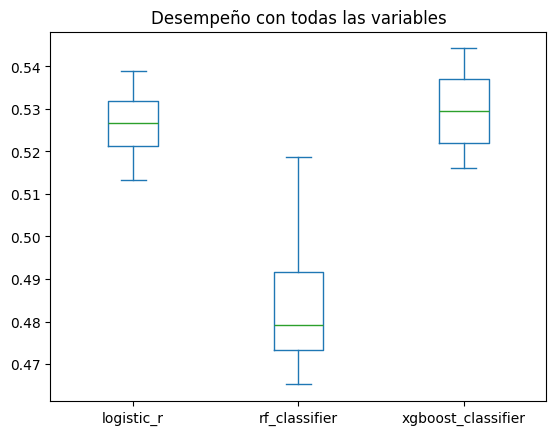

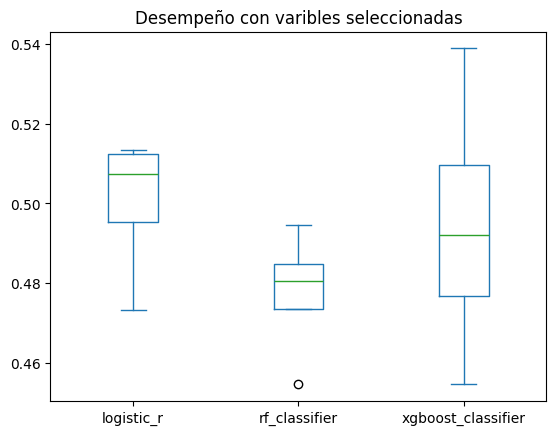

In [444]:
# Distribución del desempeño
rec_df.plot(kind = 'box', title= 'Desempeño con todas las variables')
rec_df_sel.plot(kind = 'box', title= 'Desempeño con varibles seleccionadas')

Conclusiones:
- Se utiliza recall como métrica principal porque es clave identificar correctamente a los clientes positivos, minimizando el riesgo de pasarlos por alto, especialmente en contextos con clases desbalanceadas.
- La selección de variables no tiene un impacto positivo; en ciertos escenarios, incluso empeora el rendimiento.
- Los gráficos muestran que XGBClassifie con todas las variables presenta mayor estabilidad frente a los demás modelos, ademas de alcanzar un desempeño más alto que los otros dos modelos.

### Afinamiento de hiperparámetros

#### Modelo XGB sin hiperparámetros

In [445]:
# Entrenar Modelo
m_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[18:19:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [446]:
# Predicciones
y_pred = m_xgb.predict(X_test)

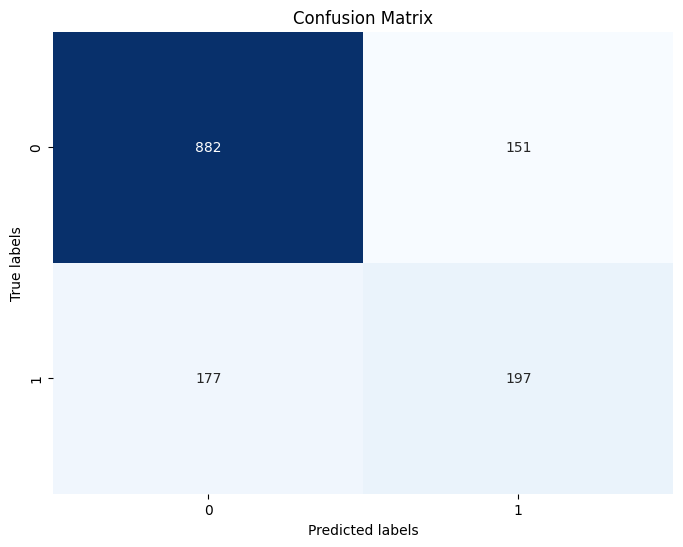

In [447]:
# Matriz de confución
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [462]:
TP = 197
TN = 882
FP = 151
FN = 177

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (churn): {precision:.2f}")
print(f"Recall (churn): {recall:.2f}")
print(f"F1-Score (churn): {f1:.2f}")


Accuracy: 0.77
Precision (churn): 0.57
Recall (churn): 0.53
F1-Score (churn): 0.55


Conclusiones:
- Buen desempeño general: El modelo predice bien cuando el cliente no abandona el servicio (Clase 0), con 882 verdaderos negativos y solo 151 falsos positivos.
- Peor desempeño con abandono: Tiene más errores al predecir cuando el cliente sí abandona (Clase 1), con 177 falsos negativos frente a solo 197 verdaderos positivos.

### Modelo XGB con hiperparámetros

In [451]:
# Peso clase positiva
n_positive = np.sum(y_train == 1)
n_negative = np.sum(y_train == 0)

scale_pos_weight = n_negative / n_positive

In [452]:
# Grilla
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'scale_pos_weight': [scale_pos_weight]
}

In [457]:
# Búsqueda aleatoria
tun = random_search = RandomizedSearchCV(
        estimator=m_xgb,
        param_distributions=param_dist,
         n_iter=20,
         scoring=make_scorer(f1_score),
        cv=5,
        verbose=2,
        n_jobs=-1,
        random_state=42
)

In [458]:
# Entrenar modelo
tun.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[18:44:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300],
                                        'scale_pos_weight': [np.float64(2.762541806020067)],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42,
                   scoring=make_scorer(f1_score, response_method='predict'),
                   verbose=2)

In [459]:
# Predicciones
y_pred = tun.predict(X_test)

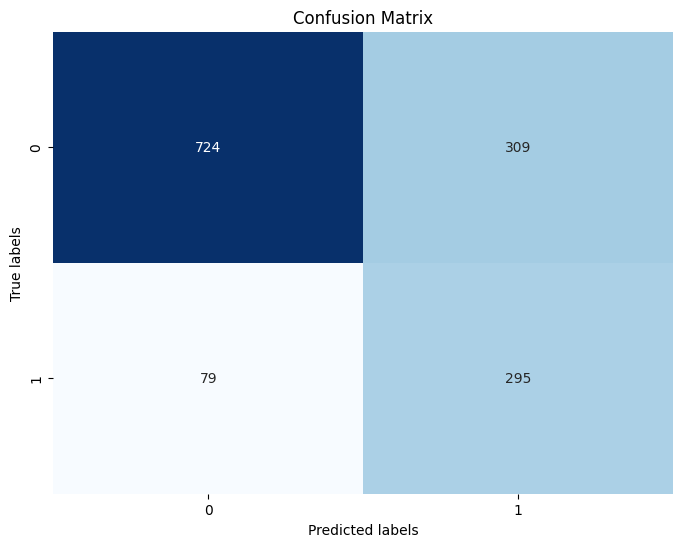

In [460]:
# Matriz de confución
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [461]:
TP = 295
TN = 724
FP = 309
FN = 79

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (churn): {precision:.2f}")
print(f"Recall (churn): {recall:.2f}")
print(f"F1-Score (churn): {f1:.2f}")


Accuracy: 0.72
Precision (churn): 0.49
Recall (churn): 0.79
F1-Score (churn): 0.60


Conclusiones:
- El modelo captura una buena cantidad de churn (recall alto: 295 de 374). Sin embargo, tiene bastantes falsos positivos (309).
- Sin hiperparámetros, el modelo era más conservador, con mejor precisión y exactitud general, pero se le escapaban muchos churn reales.
- Se selecciono el modelo con hiperpárametros esto a que detecta mucho mejor los casos reales de churn.

### Importancia de las variables

In [465]:
importancia = pd.DataFrame({
    'variable': X_train.columns,
    'peso': tun.best_estimator_.feature_importances_
})

importancia = importancia.sort_values('peso', ascending=False)

print(importancia.head())


                          variable      peso
19               Contract_Two year  0.310245
17     InternetService_Fiber optic  0.137954
18               Contract_One year  0.119211
21  PaymentMethod_Electronic check  0.071511
4                           tenure  0.036981


 Conclusiones:
- Contract_Two year. Es la variable más influyente, los clientes con contrato de dos años tienen un comportamiento notablemente distinto  (menos abandono). Se podria fomentar contratos a largo plazo, diseñando promociones o descuentos para que los clientes pasen de contratos mensules a anuales.
- Los clientes que tienen fibra optica son mas propensos a abandonar el servicio, por lo que se podria realizar una segmentacion a estos clientes y contactarlos previamente para asegurar su satisfaccion.
- Los clientes que pagan por cheque electrónico son más propensos al abandono. Se podria realizar una campaña insentvando los pagos con tarjeta de credito, al igual que reducir el total del gasto si se usa este metodo de pago.

### Predicciones

In [470]:
X_test_copy = X_test.copy()

# Agrega las predicciones y las etiquetas reales
X_test_copy['Real'] = y_test.values

In [480]:
X_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1407 entries, 971 to 2086
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 1407 non-null   float64
 1   SeniorCitizen                          1407 non-null   int64  
 2   Partner                                1407 non-null   int64  
 3   Dependents                             1407 non-null   int64  
 4   tenure                                 1407 non-null   int64  
 5   PhoneService                           1407 non-null   int64  
 6   MultipleLines                          1407 non-null   int64  
 7   OnlineSecurity                         1407 non-null   int64  
 8   OnlineBackup                           1407 non-null   int64  
 9   DeviceProtection                       1407 non-null   int64  
 10  TechSupport                            1407 non-null   int64  
 11  Streami

In [472]:
# Abandono test
print(X_test_copy['Real'].value_counts())

Real
0    1033
1     374
Name: count, dtype: int64


In [474]:
# Abandono test vs contrato de dos años
churn_by_contract = X_test_copy.groupby('Contract_Two year')['Real'].mean()
print(churn_by_contract)

Contract_Two year
False    0.338889
True     0.024465
Name: Real, dtype: float64


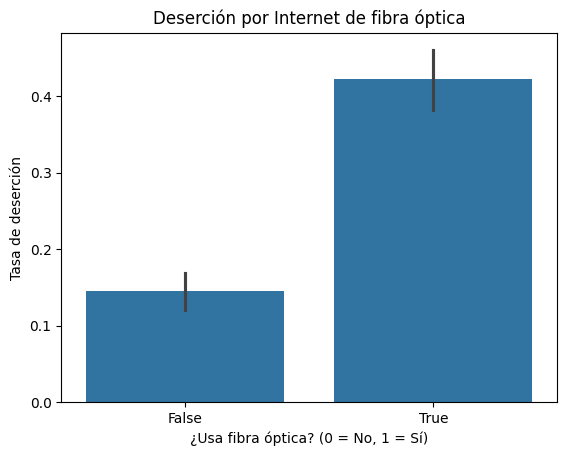

In [477]:
sns.barplot(data=X_test_copy, x='InternetService_Fiber optic', y='Real')
plt.title('Deserción por Internet de fibra óptica')
plt.xlabel('¿Usa fibra óptica? (0 = No, 1 = Sí)')
plt.ylabel('Tasa de deserción')
plt.show()

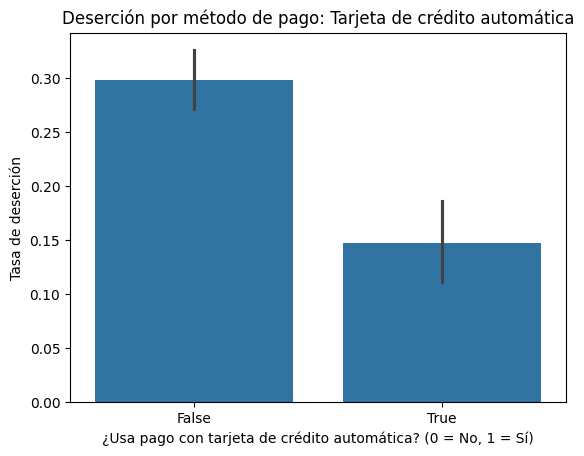

In [484]:
sns.barplot(data=X_test_copy, x='PaymentMethod_Credit card (automatic)', y='Real')
plt.title('Deserción por método de pago: Tarjeta de crédito automática')
plt.xlabel('¿Usa pago con tarjeta de crédito automática? (0 = No, 1 = Sí)')
plt.ylabel('Tasa de deserción')
plt.show()

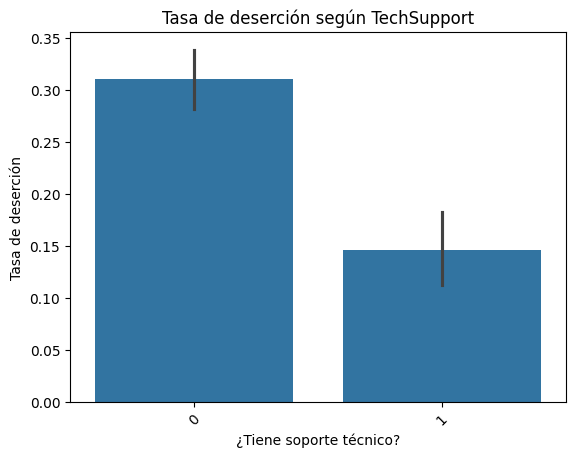

In [485]:
sns.barplot(data=X_test_copy, x='TechSupport', y='Real', estimator='mean')
plt.title('Tasa de deserción según TechSupport')
plt.xlabel('¿Tiene soporte técnico?')
plt.ylabel('Tasa de deserción')
plt.xticks(rotation=45)
plt.show()

 Conclusiones
1. La deserción general es del 26.6%. De 1,407 clientes en el conjunto de prueba, 374 desertaron. Esto representa un desafío importante en la retención de clientes.
2. El tipo de contrato influye fuertemente en la deserción.
Clientes con contrato de dos años tienen una tasa de deserción muy baja (2.44%). Se podria fomentar contratos a largo plazo, diseñando promociones o descuentos para que los clientes pasen de contratos mensules a anuales.
3.Los Clientes con fibra óptica e Internet están más propensos a desertar.
Estos clientes probablemente pagan más, y si no reciben un buen servicio, desertan rápidamente.
4. El soporte técnico tiene efecto en la deserción. Clientes sin soporte técnico tienen mayores tasas de deserción.


Estrategias para Reducir la Deserción y Mejorar la Retención de Clientes.
- Para reducir la deserción, se recomienda diseñar promociones exclusivas que incentiven a los clientes actuales a migrar desde contratos mensuales hacia planes de 12 o 24 meses. Es clave resaltar beneficios como la estabilidad en el precio, el acceso a atención prioritaria o la posibilidad de obtener ahorros a largo plazo. Comunicar de forma clara estas ventajas puede generar mayor confianza y compromiso por parte del cliente.
- La segmentación es fundamental para identificar a los clientes con mayor riesgo de cancelación, especialmente aquellos que tienen contrato mensual, no cuentan con soporte técnico o utilizan el servicio de fibra óptica. A partir de estos perfiles, se deben aplicar campañas personalizadas de retención que ofrezcan soluciones ajustadas a sus necesidades. El uso de modelos analíticos puede ayudar a priorizar estas acciones de forma más eficiente.
- El soporte técnico es un factor clave en la experiencia del cliente. Se sugiere incentivar su uso desde los primeros 90 días del servicio para fortalecer la confianza y resolver dudas o problemas iniciales. Además, incluir TechSupport como parte de beneficios exclusivos en planes anuales o en programas de fidelización puede mejorar la percepción general del servicio. Una atención proactiva y especializada marca la diferencia en la retención
- Para aumentar la satisfacción y disminuir la deserción, es necesario investigar a fondo las razones por las que algunos clientes abandonan el servicio de fibra, ya sea por precio, fallos técnicos o falta de información. Comunicar de forma efectiva las ventajas del servicio, como su velocidad, estabilidad y rendimiento, ayudará a reforzar su valor percibido. También es clave fortalecer la atención al cliente con tiempos de respuesta rápidos y soluciones efectivas.
- El modelo predictivo debe implementarse en producción para identificar automáticamente a los clientes con alta probabilidad de cancelar el servicio. A partir de estos resultados, se recomienda automatizar alertas internas que activen acciones preventivas o campañas de fidelización específicas. Monitorear el rendimiento del modelo y ajustarlo de forma continua permitirá una gestión más precisa y anticipada del churn